# model.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

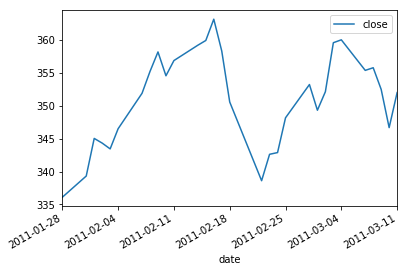

In [19]:
data = pd.read_csv('../data/aapl.csv', header=None, usecols=[1, 3,4,5,6,7])
data.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
# 把date列转为日期类型
def dmy2ymd(dmy):
    ymd = '-'.join(dmy.split('-')[::-1])
    return ymd

data['date'] = data['date'].apply(dmy2ymd)
data['date'] = data['date'].astype('M8[D]')
data.plot(x='date', y='close')

In [31]:
# 基于线性拟合理论，绘制描述股价走势的趋势线
# 整理date字段，变为数字字段
days = (data['date'] - pd.to_datetime('20110127')).dt.days
A = np.column_stack((days, np.ones_like(days)))
B = data['close']
# 基于linalg.lstsq(A, B) 求最佳拟合参数
x = np.linalg.lstsq(A, B)[0]
x

C:\Users\xuming\AppData\Local\Continuum\anaconda3\envs\aid\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


array([1.75245535e-01, 3.47059593e+02])

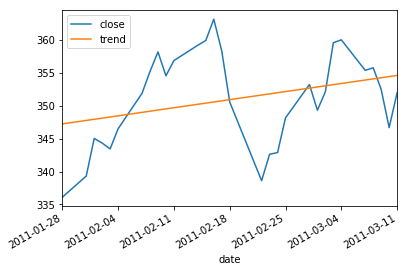

In [33]:
# 绘制趋势线
trend_line = x[0] * days + x[1]
data['trend'] = trend_line
data.plot(x='date', y=['close', 'trend'])

## 多项式模型

In [43]:
# y = 4x<sup>3</sup> + 3x<sup>2</sup> - 1000x + 1
def f(x):
    p = [4, 3, -1000, 1]
    return np.polyval(p, x)

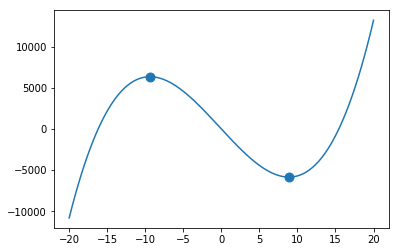

In [45]:
x = np.linspace(-20, 20, 200)
y = f(x)
plt.plot(x, y)
p = [4, 3, -1000, 1]
q = np.polyder(p)
# 导函数的根即是驻点坐标
xs = np.roots(q)
ys = f(xs)
plt.scatter(xs, ys, s=80)

array([38.81228477, 28.26409333, 15.25554414,  2.20802013])

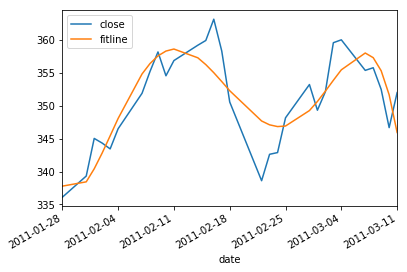

In [64]:
# 针对aapl股票收盘价做多项式拟合，绘制拟合曲线。
p = np.polyfit(days, data['close'], 5)
# 把x带入多项式，求出曲线上的坐标点
fitline = np.polyval(p, days)
data['fitline'] = fitline
data.plot(x='date', y=['close', 'fitline'])
# 通过数学手段计算波峰波谷，与业务结合进行数据分析。
q = np.polyder(p)
xs = np.roots(q)
xs